In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
data = pd.read_csv("NER_vordlus.csv")

In [3]:
data

,Mudel,Train_kadu,Val_kadu,Precision,Recall,F1,Accuracy,Epohh
0,100K,0.2673,0.184147,0.560040,0.406891,0.471338,0.939848,epohh-1
1,100K,0.1618,0.151107,0.622083,0.508065,0.559322,0.949660,epohh-2
2,100K,0.1150,0.146104,0.608483,0.546921,0.576062,0.950449,epohh-3
3,100K,NaN,NaN,0.583603,0.533014,0.557162,0.949064,test
4,200K,0.2604,0.171436,0.559086,0.412757,0.474905,0.941031,epohh-1
5,200K,0.1591,0.144854,0.626549,0.519062,0.567763,0.949808,epohh-2
6,200K,0.1198,0.139685,0.609562,0.560850,0.584192,0.951090,epohh-3
7,200K,NaN,NaN,0.600963,0.552195,0.575548,0.950723,test
8,300K,0.2625,0.175079,0.569530,0.408358,0.475662,0.940588,epohh-1
9,300K,0.1643,0.145499,0.628054,0.508798,0.562171,0.949364,epohh-2


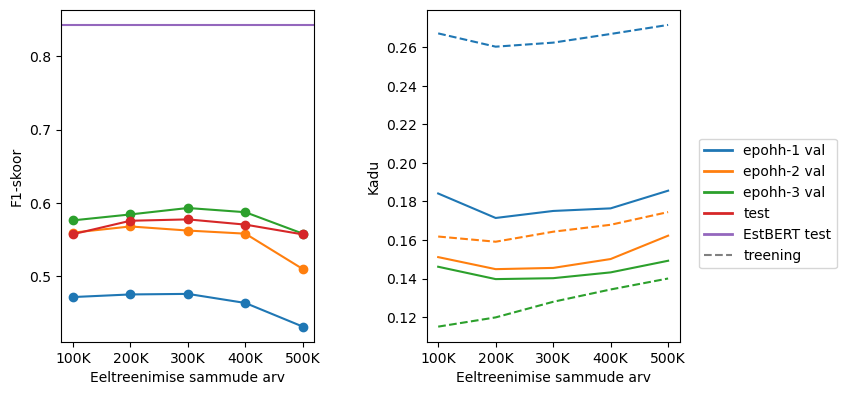

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
fig.tight_layout(pad=5.0)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'gray']

for i, epohh in enumerate(data.Epohh.unique()):
    epohh_data = data[data.Epohh == epohh][:-1]
    ax1.plot(epohh_data.Mudel, epohh_data.F1, label = epohh, marker='o', c = colors[i])

estbert_data = data[(data.Mudel == "EstBERT") & (data.Epohh == "test")]
ax1.axhline(y=float(estbert_data.F1), color='tab:purple', label = "EstBERT test")

ax1.set(xlabel="Eeltreenimise sammude arv", ylabel="F1-skoor")

for i, epohh in enumerate(data.Epohh.unique()):
    epohh_data = data[data.Epohh == epohh][:-1]
    ax2.plot(epohh_data.Mudel, epohh_data.Train_kadu, label = epohh, linestyle = "--", c = colors[i])
    ax2.plot(epohh_data.Mudel, epohh_data.Val_kadu, label = epohh, c = colors[i])
    
#estbert_data = data[(data.Mudel == "EstBERT") & (data.Epohh == "epohh-3")]
#ax2.axhline(y=float(estbert_data.Val_kadu), color='tab:purple', label = "EstBERT")

ax2.set(xlabel="Eeltreenimise sammude arv", ylabel="Kadu")


lines = [Line2D([0], [0], color=c, linewidth=2) if c != 'gray' else
Line2D([0], [0], color=c, linewidth=1.5, linestyle = "--") for c in colors ]
labels = ['epohh-1 val', 'epohh-2 val', 'epohh-3 val', 'test', 'EstBERT test', 'treening']

ax2.legend(lines, labels, loc = "lower right", bbox_to_anchor = (1.65, 0.2), )

#plt.savefig('NER_kohandamine.JPG')
plt.show()

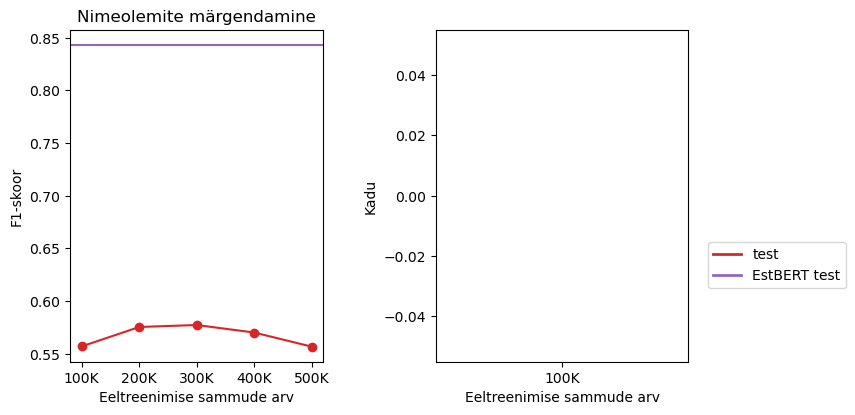

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
fig.tight_layout(pad=5.0)

colors = ['tab:red', 'tab:purple']

data2 = data[data.Epohh == "test"]

for i, epohh in enumerate(data2.Epohh.unique()):
    epohh_data = data2[data2.Epohh == epohh][:-1]
    ax1.plot(epohh_data.Mudel, epohh_data.F1, label = epohh, marker='o', c = colors[i])

estbert_data = data2[(data2.Mudel == "EstBERT") & (data2.Epohh == "test")]
ax1.axhline(y=float(estbert_data.F1), color='tab:purple', label = "EstBERT test")

ax1.set(xlabel="Eeltreenimise sammude arv", ylabel="F1-skoor")
ax1.set_title("Nimeolemite märgendamine")

for i, epohh in enumerate(data.Epohh.unique()):
    epohh_data = data2[data2.Epohh == epohh][:-1]
    ax2.plot(epohh_data.Mudel, epohh_data.Train_kadu, label = epohh, linestyle = "--", c = colors[i])
    ax2.plot(epohh_data.Mudel, epohh_data.Val_kadu, label = epohh, c = colors[i])
    
#estbert_data = data[(data.Mudel == "EstBERT") & (data.Epohh == "epohh-3")]
#ax2.axhline(y=float(estbert_data.Val_kadu), color='tab:purple', label = "EstBERT")

ax2.set(xlabel="Eeltreenimise sammude arv", ylabel="Kadu")

lines = [Line2D([0], [0], color=c, linewidth=2) if c != 'gray' else
Line2D([0], [0], color=c, linewidth=1.5, linestyle = "--") for c in colors ]
labels = ['test', 'EstBERT test']

ax2.legend(lines, labels, loc = "lower right", bbox_to_anchor = (1.65, 0.2), )

#plt.savefig('NER_kohandamine.JPG')
plt.show()